# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [3]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[int(num_test/2):], newsgroups_test.target[int(num_test/2):]
dev_data, dev_labels = newsgroups_test.data[:int(num_test/2)], newsgroups_test.target[:int(num_test/2)]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('test label shape:', test_labels.shape)
print('dev label shape:', dev_labels.shape)
print('labels names:', newsgroups_train.target_names)

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

[2 pts]

In [7]:
def P1(num_examples=5):
### STUDENT START ###
    # iterate through the specified first number of examples and print them out
    for i in range(num_examples):
        print('Example %d, Label:' %(i+1), newsgroups_train.target_names[train_labels[i]])
        print('Text:\n', train_data[i])

        print('-'*50, '\n')

### STUDENT END ###
P1(2)

Example 1, Label: comp.graphics
Text:
 Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
-------------------------------------------------- 

Example 2, Label: talk.religion.misc
Text:
 

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcak

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

[6 pts]

In [62]:
def P2():
### STUDENT START ###


    v1 = CountVectorizer() # create an object of standard CountVectorizer
    data_matrix = v1.fit_transform(train_data) # get the sparse matrix of the transformed train data
    num_examples, num_features = data_matrix.shape # get the number of example and features

    ############### answers to question a.

    print('Answers to question a:')

    # get size of vocabulary
    print('\tThe size of the vocabulary is:', num_features)

    # get the average nonzero feature count per example
    print('\tThe average nonzero feature count per example: %5.2f' %(data_matrix.nnz/num_examples))

    # get the fraction of the entries in the matrix are non-zero
    print('\tThe fraction of the entries in the matrix are non-zero: %1.5f' %(data_matrix.nnz/(num_examples * num_features)))

    print('\n')

    ############### answers to question b.

    feature_names = v1.get_feature_names()

    print('Answers to question b:')
    # print the 0th and last feature strings
    print('\tThe 0th feature:', feature_names[0])
    print('\tThe last feature:', feature_names[-1])
    print('\n')


    ############### answers to question c.

    # build my vocab with the four words
    my_vocab = ["atheism", "graphics", "space", "religion"]
    # fit the vocab
    v1.fit(my_vocab)
    # transform the data with the model of the vocab fitted
    my_vocab_data = v1.transform(train_data)
    print('Answers to question c:')
    # confirm the shape
    print('\tThe shape of the transformed data is:', my_vocab_data.shape)
    print('\tThe shape is expected since we have four words in our vocab and the same number of examples used in training')
    print('\tThe average nonzero feature count per example: %5.2f' %(my_vocab_data.nnz/num_examples))
    print('\n')

    ############### answers to question d.

    # generate a vectorizer for bi-gram and tri-gram character features
    v2 = CountVectorizer(analyzer = 'char', ngram_range = (2,3))
    # fit the training data
    v2.fit(train_data)
    # print answer
    print('Answers to question d:')
    print('\tVocab size is:', len(v2.get_feature_names()))
    print('\n')

    ############### answers to question e.
    # generate a vectorizer for with the cut-off of 10
    v3 = CountVectorizer(min_df = 10)
    v3.fit(train_data)
    # print answer
    print('Answers to question e:')
    print('\tVocab size of only the words appearing in at least ten documents is:', len(v3.get_feature_names()))
    print('\n')

    ############### answers to question f.
    # fit dev data and get the features
    v1.fit(dev_data)
    dev_features = v1.get_feature_names()

    # fit train data again
    v1.fit(train_data)

    # identify the features in dev but not in train
    not_in_train = 0
    for feature in dev_features:
        if v1.vocabulary_.get(feature) == None:
            not_in_train += 1
    # print answers
    print('Answers to question f:')
    print('\tThere are %d words in the dev data, out of which, %d do not exist in the train data.' %(len(dev_features), not_in_train))
    print('\tThat is %3.1f%%' %(not_in_train/len(dev_features)*100))

### STUDENT END ###
P2()

Answers to question a:
	The size of the vocabulary is: 26879
	The average nonzero feature count per example: 96.71
	The fraction of the entries in the matrix are non-zero: 0.00360


Answers to question b:
	The 0th feature: 00
	The last feature: zyxel


Answers to question c:
	The shape of the transformed data is: (2034, 4)
	The shape is expected since we have four words in our vocab and the same number of examples used in training
	The average nonzero feature count per example:  0.27


Answers to question d:
	Vocab size is: 35478


Answers to question e:
	Vocab size of only the words appearing in at least ten documents is: 3064


Answers to question f:
	There are 16246 words in the dev data, out of which, 4027 do not exist in the train data.
	That is 24.8%


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

[4 pts]

Questions:
1. how to find a range for k and alphas to optimize on
> either with domain knowledge, random pick, or brute force search
> sometimes people also use gradient descent to find the optimize hyperparameter. Any p
2. Are we trying to find the optimal hyperparameter based on the f1_score calculated by the dev set?
> if it's time series, we have to use the dev set becasue k-fold will not work. but in this case, it doesn't matter much.
3. I'm suspecting the sparseness of the feature spaces had greater impact on logistic regression than it has on NB. However, I'm not sure as to why.

C:\Users\erik.hou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\erik.hou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erik.hou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[0.7544378698224852, 0.7692307692307693, 0.7751479289940828, 0.7795857988165681, 0.7928994082840237, 0.7884615384615384, 0.7810650887573964, 0.7736686390532546, 0.6967455621301775] [0.7544378698224852, 0.7692307692307693, 0.7751479289940828, 0.7795857988165681, 0.7928994082840237, 0.7884615384615384, 0.7810650887573964, 0.7736686390532544, 0.6967455621301775]
[0.00770175 0.0119412  0.00943508 0.00910284]
[0.16509345 0.20095275 0.18067094 0.18724278]
[2.54149597 2.93970937 2.86246884 2.25002867]
[27.13276422 24.65876272 27.45791178 23.02092251]
[102.60222594  83.1201744   99.01364429  88.98434638]
[166.96406144 130.8904599  157.88282512 145.71125673]
[257.63081206 197.94301097 239.9678541  226.71318397]
[584.53080597 448.08852555 539.41970751 530.78234875]


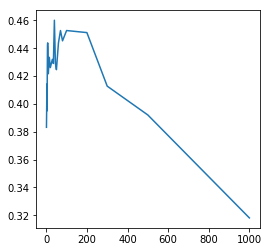

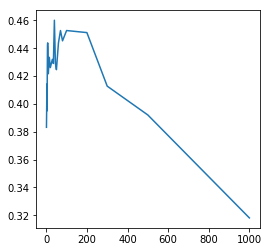

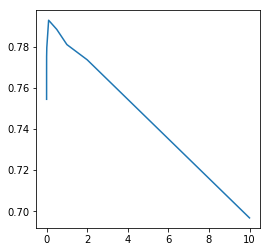

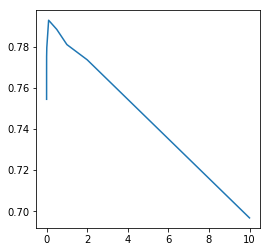

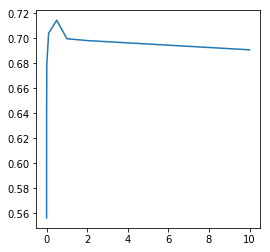

In [54]:
#def P3():
### STUDENT START ###

default_vectorizer = CountVectorizer()
train_matrix = default_vectorizer.fit_transform(train_data)
dev_matrix = default_vectorizer.transform(dev_data)

ks = [1,2,3,4,5,6,7,8,9,10,15,20,30,35,40,45,50,60,70,80, 100, 200, 300, 500, 1000]

f1_scores = []
accuracies = []
for k in ks:
    clf_knn = KNeighborsClassifier(n_neighbors = k)
    clf_knn.fit(train_matrix, train_labels)
    predictions = clf_knn.predict(dev_matrix)
    
    f1_scores.append(metrics.f1_score(dev_labels, predictions, average = 'micro'))
    
    correct = 0
    for true, predict in zip(dev_labels, predictions):
        if true == predict:
            correct += 1
    
    accuracies.append(correct/len(predictions))
    
plt.figure(figsize = (4,4))

plt.plot(ks, f1_scores)

plt.figure(figsize = (4,4))

plt.plot(ks, accuracies)

alphas = [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]

f1_scores = []
accuracies = []
for alpha in alphas:
    mnb = MultinomialNB(alpha = alpha)
    mnb.fit(train_matrix, train_labels)
    predictions = mnb.predict(dev_matrix)
    
    f1_scores.append(metrics.f1_score(dev_labels, predictions, average = 'micro'))
    accuracies.append(metrics.accuracy_score(dev_labels, predictions))
    
plt.figure(figsize = (4,4))

plt.plot(alphas, f1_scores)

plt.figure(figsize = (4,4))

plt.plot(alphas, accuracies)

print(f1_scores[0:10], accuracies[0:10])

cs = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]

f1_scores = []
for c in cs:
    logist_regress = LogisticRegression(C = c)
    logist_regress.fit(train_matrix, train_labels)
    predictions = logist_regress.predict(dev_matrix)
    
    f1_scores.append(metrics.f1_score(dev_labels, predictions, average = 'micro'))
    accuracies.append(metrics.accuracy_score(dev_labels, predictions))
    
    params = logist_regress.coef_
    print(np.sum(np.square(params), axis = 1))
    
plt.figure(figsize = (4,4))

plt.plot(cs, f1_scores)


### STUDENT END ###
#P3()

In [11]:
print(f1_scores)
print(cs)

[0.5562130177514792, 0.6375739644970414, 0.6789940828402367, 0.7041420118343196, 0.7144970414201184, 0.6997041420118343, 0.6982248520710059, 0.6908284023668639]
[0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]


In [60]:
logist_regress = LogisticRegression(C = 0.5)
logist_regress.fit(train_matrix, train_labels)
predictions = logist_regress.predict(dev_matrix)

params = logist_regress.coef_
intercepts = logist_regress.intercept_
print(metrics.f1_score(dev_labels, predictions, average = 'micro'))
print(metrics.f1_score(dev_labels, predictions, average = 'macro'))
print(metrics.accuracy_score(dev_labels, predictions))

print(confusion_matrix(dev_labels, predictions, labels = np.unique(dev_labels)))

print(classification_report(dev_labels, predictions))

print(train_matrix.shape)
print(params.shape)
print(intercepts)
print(np.square(params).shape)
print(np.sum(np.square(params), axis = 1))

z = np.dot(dev_matrix.toarray(), params.T) + intercepts
probs = 1/(1+np.exp(-z))
# print(np.sum(probs, axis = 1))
print(probs[0:10])
print(dev_labels[0:10])
print(predictions[0:10])

0.7144970414201184
0.6920151915112704
0.7144970414201184
[[ 92  12  25  36]
 [  5 162  16   2]
 [ 14  17 163   5]
 [ 38  11  12  66]]
              precision    recall  f1-score   support

           0       0.62      0.56      0.59       165
           1       0.80      0.88      0.84       185
           2       0.75      0.82      0.79       199
           3       0.61      0.52      0.56       127

   micro avg       0.71      0.71      0.71       676
   macro avg       0.69      0.69      0.69       676
weighted avg       0.71      0.71      0.71       676

(2034, 26879)
(4, 26879)
[-1.20220761 -1.03995896 -1.0363046  -1.17118491]
(4, 26879)
[102.60222594  83.1201744   99.01364429  88.98434638]
[[1.89365083e-01 2.21172154e-01 3.92189222e-01 1.49636077e-01]
 [4.60348011e-02 7.87922701e-01 8.35053656e-02 5.17208913e-02]
 [9.48048481e-04 9.88417258e-01 2.21870759e-02 6.07250195e-03]
 [1.19471180e-04 7.59102776e-01 4.07742273e-03 8.86281131e-04]
 [3.92936907e-02 8.63730824e-01 2.28525

ANSWER:

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

[5 pts]

In [6]:
#def P4():
### STUDENT START ###


### STUDENT END ###
#P4()

ANSWER:

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

[4 pts]

countvectorizer automatically lowercase everything.

In [7]:
def empty_preprocessor(s):
    return s

#def better_preprocessor(s):
### STUDENT START ###

### STUDENT END ###

#def P5():
### STUDENT START ###

    
### STUDENT END ###
#P5()

(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

[4 pts]

In [8]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

    ### STUDENT START ###

    

    ### STUDENT END ###
P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

[4 pts]

In [9]:
#def P7():
    ### STUDENT START ###



    ### STUDENT END ###
#P7()

ANSWER:

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

- [1 pt] for a reasonable attempt
- [2 pts] for improved performance